In [1]:
from model import *
from data import *

Using TensorFlow backend.


In [2]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 0.4
set_session(tf.Session(config=config))

In [3]:
DATA_DIR = "/data/krf/dataset/ChinaSet_AllFiles"
ROOT_DIR = "/data/krf/model/rsna"

In [4]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,DATA_DIR,'CXR_png','mask',data_gen_args,save_to_dir = None)

In [5]:
model = unet()
model_checkpoint = ModelCheckpoint('unet_lung.hdf5',monitor='loss',verbose=1, save_best_only=True)

/data/krf/model/unet/model.py:58: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [6]:
model.fit_generator(myGene,steps_per_epoch=2000,epochs=5,callbacks=[model_checkpoint])

Epoch 1/5
Found 566 images belonging to 1 classes.
Found 566 images belonging to 1 classes.
2000/2000 [==============================] - 913s 456ms/step - loss: 0.2347 - acc: 0.9462

Epoch 00001: loss improved from inf to 0.23470, saving model to unet_lung.hdf5
Epoch 2/5
2000/2000 [==============================] - 902s 451ms/step - loss: 0.0764 - acc: 0.9716

Epoch 00002: loss improved from 0.23470 to 0.07638, saving model to unet_lung.hdf5
Epoch 3/5
2000/2000 [==============================] - 903s 451ms/step - loss: 0.0622 - acc: 0.9769

Epoch 00003: loss improved from 0.07638 to 0.06219, saving model to unet_lung.hdf5
Epoch 4/5
2000/2000 [==============================] - 901s 451ms/step - loss: 0.0575 - acc: 0.9786

Epoch 00004: loss improved from 0.06219 to 0.05747, saving model to unet_lung.hdf5
Epoch 5/5
2000/2000 [==============================] - 903s 451ms/step - loss: 0.0567 - acc: 0.9789

Epoch 00005: loss improved from 0.05747 to 0.05668, saving model to unet_lung.hdf5


In [7]:
testGene = testGenerator(DATA_DIR+"/test")
model = unet()
model.load_weights("unet_lung.hdf5")
results = model.predict_generator(testGene,30,verbose=1)
saveResult(DATA_DIR+"/test",DATA_DIR+"/result",results)

30/30 [==============================] - 11s 381ms/step


/data/krf/anaconda/anaconda3/lib/python3.5/site-packages/skimage/util/dtype.py:110: UserWarning: Possible precision loss when converting from float32 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [8]:
print(results.shape)
print(results)

(30, 256, 256, 1)
[[[[7.06657418e-04]
   [6.45206746e-05]
   [5.64515494e-06]
   ...
   [1.40748557e-06]
   [6.17925616e-06]
   [2.63938477e-04]]

  [[1.05101190e-05]
   [2.28870067e-06]
   [1.46316540e-06]
   ...
   [6.69920894e-07]
   [1.60520040e-06]
   [8.42302470e-05]]

  [[4.15827253e-06]
   [3.57916088e-06]
   [2.77258505e-06]
   ...
   [1.27286981e-07]
   [1.67280305e-07]
   [8.04932915e-06]]

  ...

  [[6.42036030e-05]
   [1.63014465e-05]
   [1.08474769e-05]
   ...
   [3.84548557e-17]
   [1.25656477e-16]
   [2.79835237e-13]]

  [[4.59162075e-05]
   [2.47007520e-05]
   [9.78398566e-06]
   ...
   [2.30788045e-13]
   [4.18914252e-13]
   [1.37283240e-10]]

  [[2.66023702e-03]
   [5.50550467e-04]
   [9.77547315e-05]
   ...
   [3.24006035e-12]
   [7.32878255e-12]
   [3.01873868e-08]]]


 [[[5.86171960e-03]
   [1.00921665e-03]
   [1.19346914e-04]
   ...
   [5.92518836e-06]
   [2.09568188e-05]
   [6.43685577e-04]]

  [[2.62323592e-04]
   [5.44816758e-05]
   [2.90612043e-05]
   ...
   

22
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


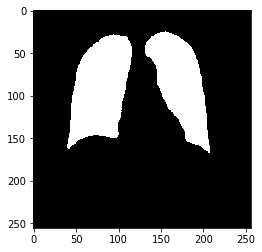

In [22]:
import random
img_idx = random.choice(range(30))
print(img_idx)

mask = results[img_idx,:,:,0] > 0.5
print(mask)
import matplotlib.pyplot as plt
plt.imshow(mask, cmap=plt.cm.bone)

In [27]:
IMG_SIZE = 256
import cv2
def loadDataset(datadir):
    image_fp = os.listdir(datadir)
    image_fp.sort()
    images = []
    for img_nm in image_fp:
        tmp = cv2.imread(os.path.join(datadir,img_nm))
        b,g,r = cv2.split(tmp)
        res = cv2.resize(b,(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype(np.uint8)
        images.append(res[:,:,np.newaxis])
    images = np.asarray(images)
    print(images.shape)
    return images

In [28]:
images = loadDataset(DATA_DIR+"/test")

(30, 256, 256, 1)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


Text(0.5, 1.0, 'Predicted Lung Segmentation')

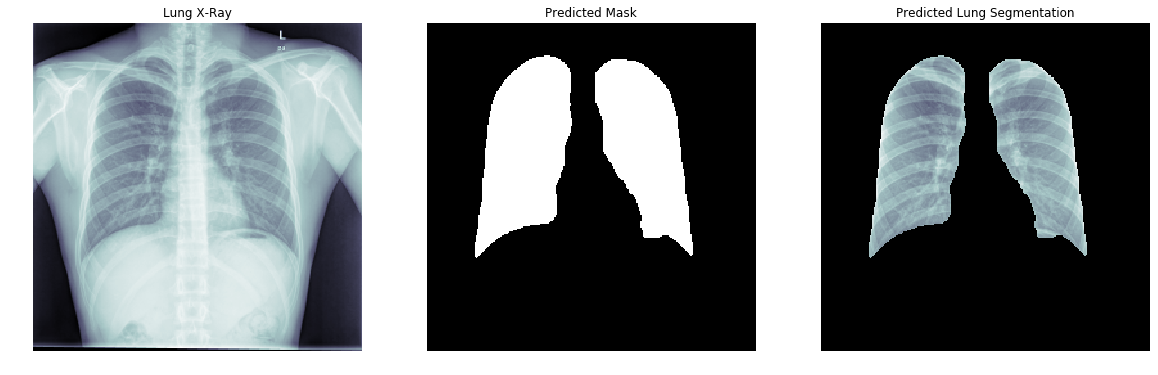

In [30]:
plt.figure(figsize=(20, 10))

img_index = random.choice(range(30))

plt.subplot(1,3,1)
random_img = images[img_index,:,:,0]
plt.imshow(random_img, cmap=plt.cm.bone)
plt.axis('off')
plt.title('Lung X-Ray')

mask = results[img_index,:,:,0] > 0.5
print(mask)
plt.subplot(1,3,2)
plt.imshow(mask, cmap=plt.cm.bone)
plt.axis('off')
plt.title('Predicted Mask')

plt.subplot(1,3,3)
plt.imshow(cv2.bitwise_and(random_img, random_img, mask=mask.astype(np.uint8)), cmap=plt.cm.bone)
plt.axis('off')
plt.title('Predicted Lung Segmentation')

In [31]:
croped = cv2.bitwise_and(random_img, random_img, mask=mask.astype(np.uint8))

(256, 256)


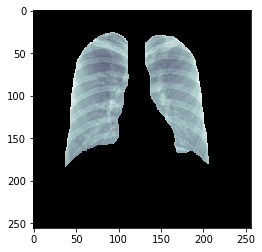

In [33]:
print(croped.shape)
plt.imshow(croped, cmap=plt.cm.bone)

In [3]:
import pydicom

In [4]:
CASE_DIR = "/data/krf/dataset/stage_1_train_images/"
case_list = os.listdir(CASE_DIR)
case_nm ="02c2331d-b3fa-4d55-bf86-f0efbd589c86.dcm"
case_fp = os.path.join(CASE_DIR,case_nm)

In [35]:
def testGenerator2(test_path,num_image,target_size = (256,256),flag_multi_class = False,as_gray = True):
    f_list = os.listdir(test_path)
    f_list.sort()
    for f in f_list[:num_image]:
        #img = io.imread(os.path.join(test_path,f),as_gray = as_gray)
        img = pydicom.read_file(os.path.join(test_path,f)).pixel_array
        img = img / 255
        img = trans.resize(img,target_size)
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)
        yield img

In [56]:
testGene2 = testGenerator2(CASE_DIR,20000)
model2 = unet()
model2.load_weights("unet_lung.hdf5")
results2 = model2.predict_generator(testGene2,20000,verbose=1)
#saveResult(DATA_DIR+"/test",DATA_DIR+"/result",results)

20000/20000 [==============================] - 693s 35ms/step


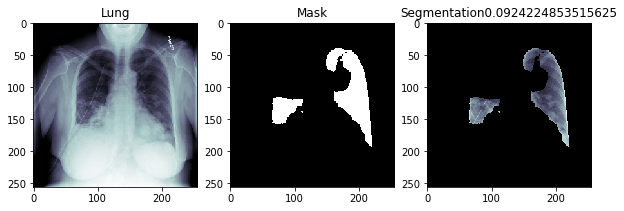

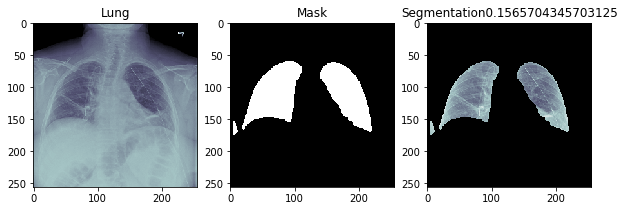

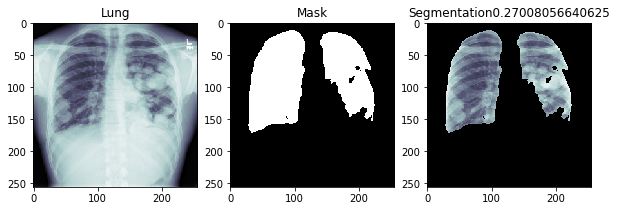

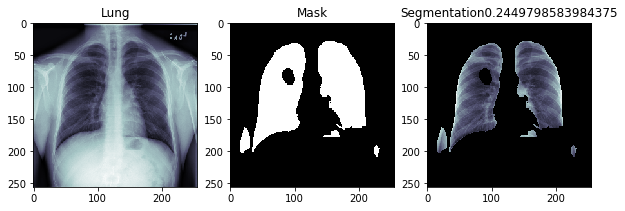

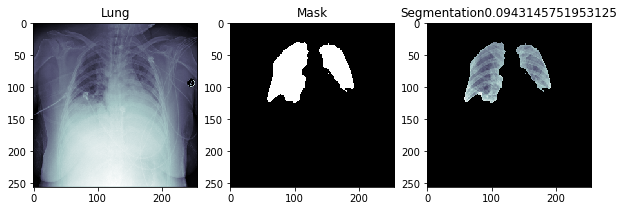

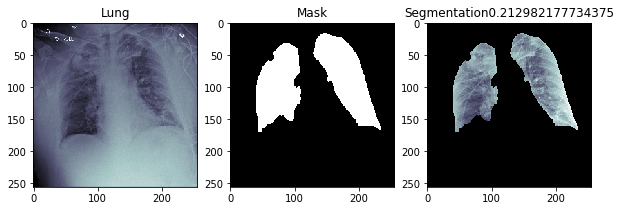

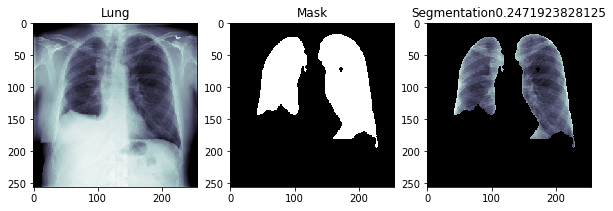

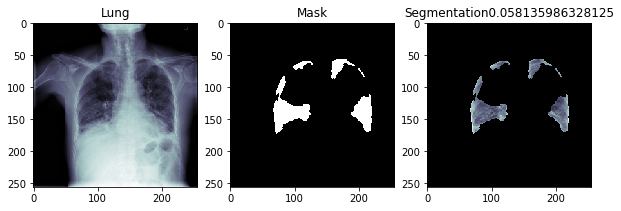

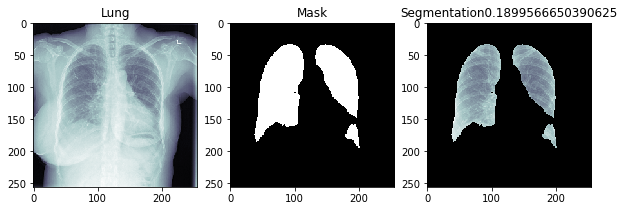

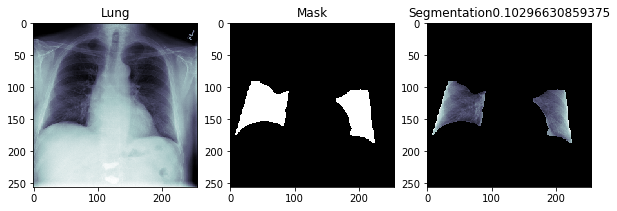

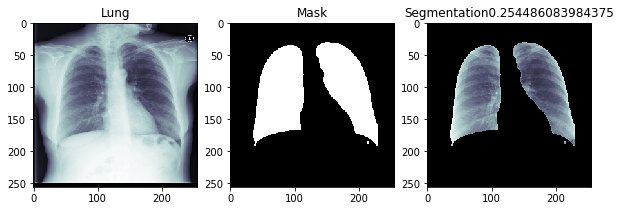

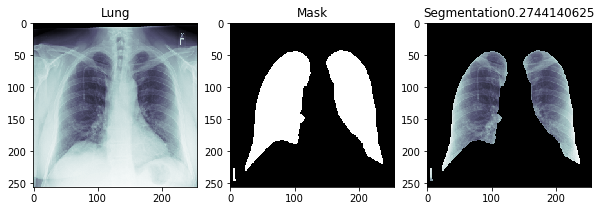

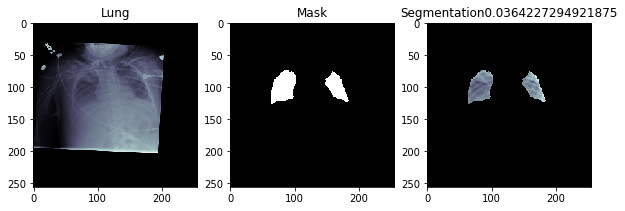

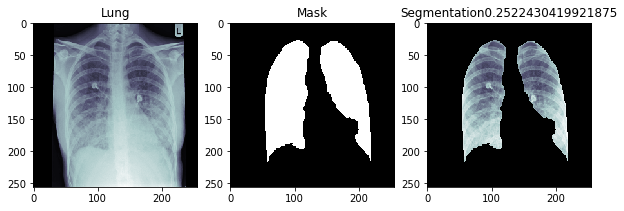

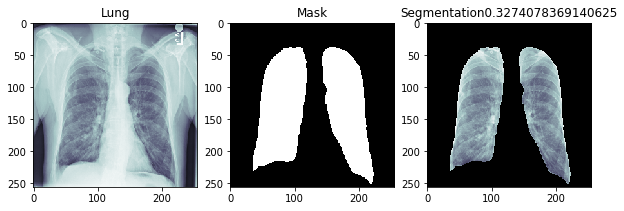

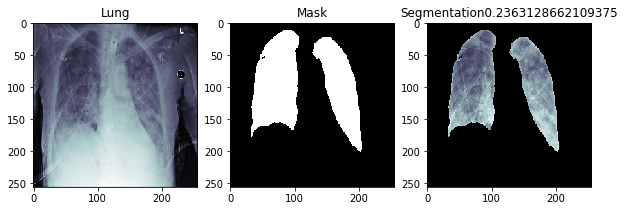

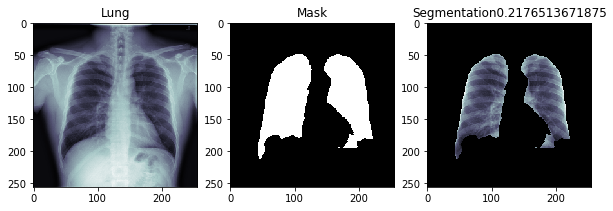

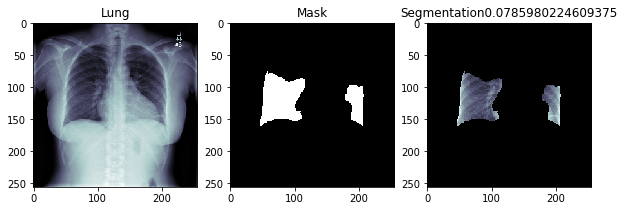

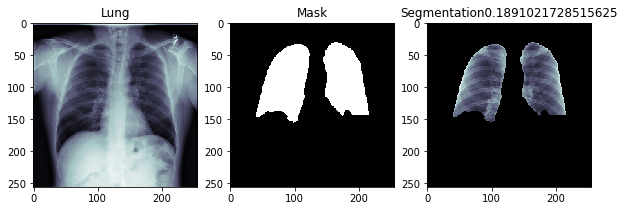

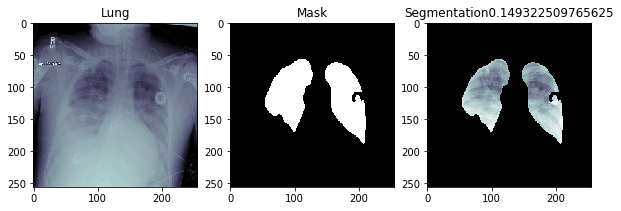

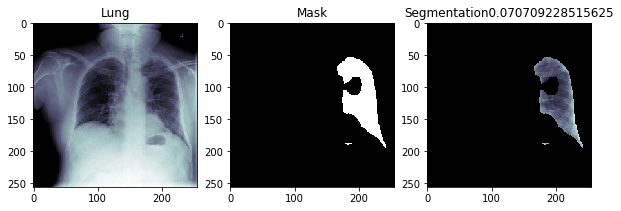

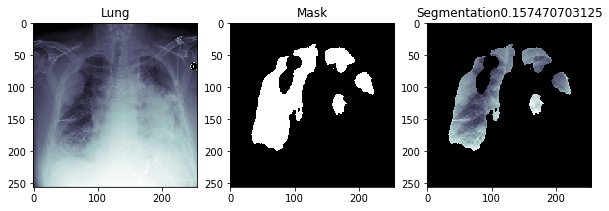

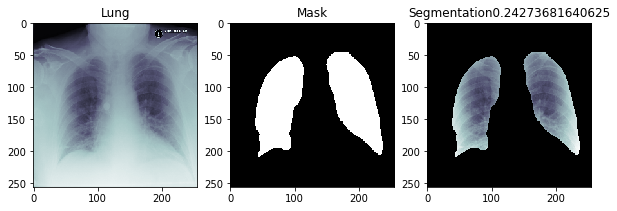

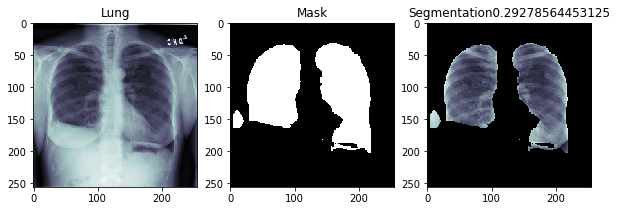

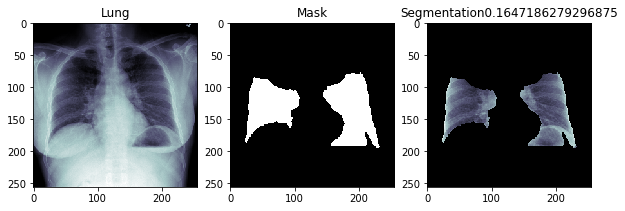

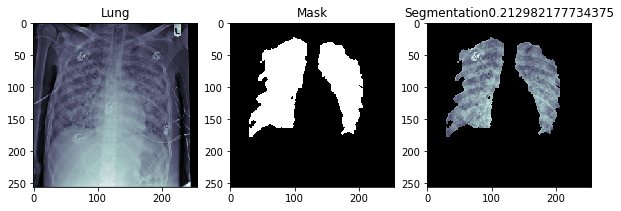

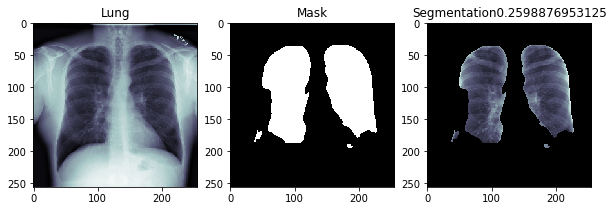

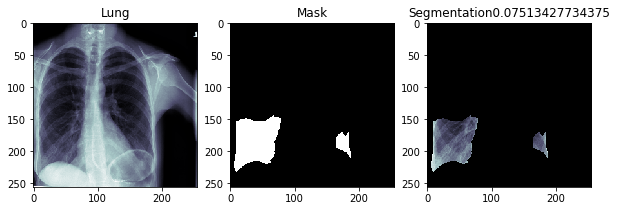

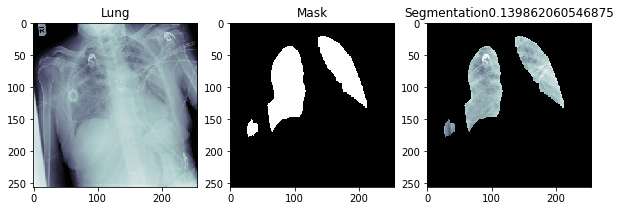

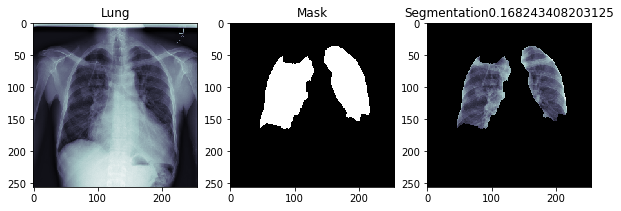

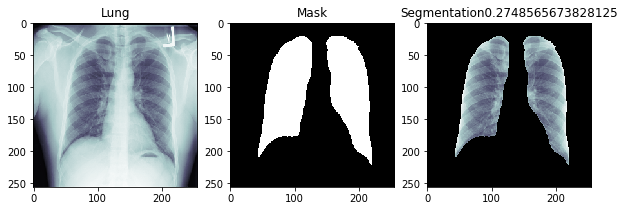

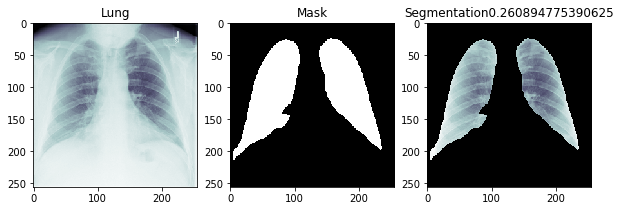

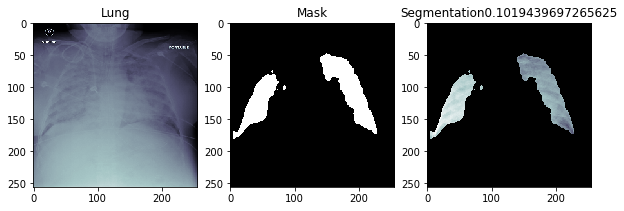

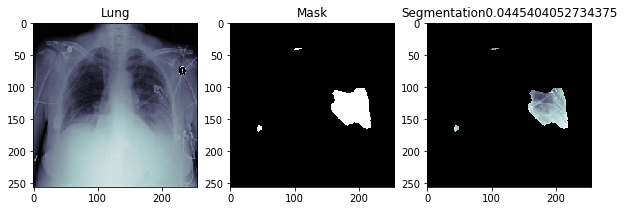

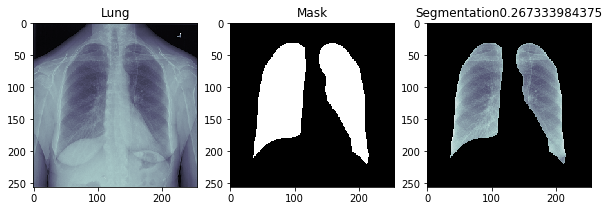

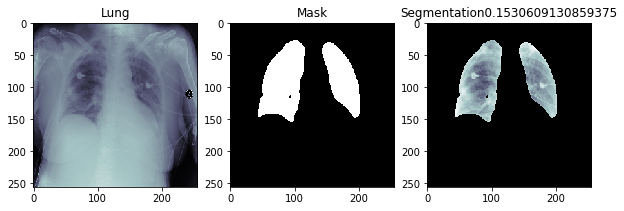

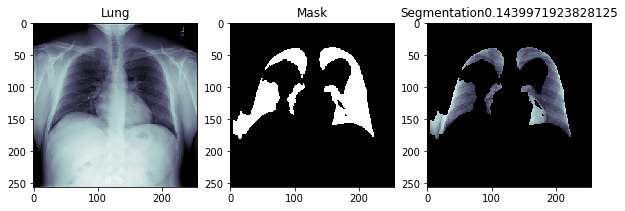

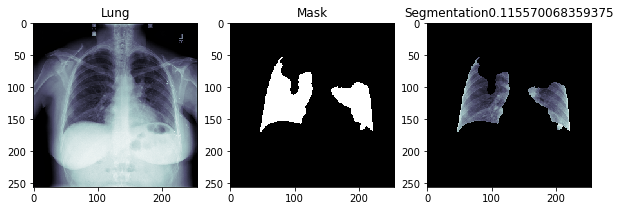

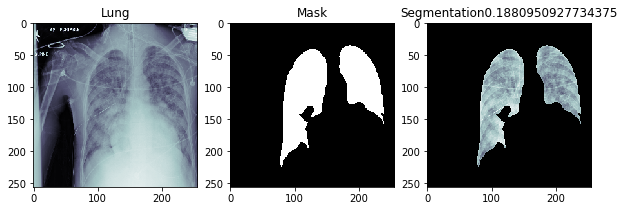

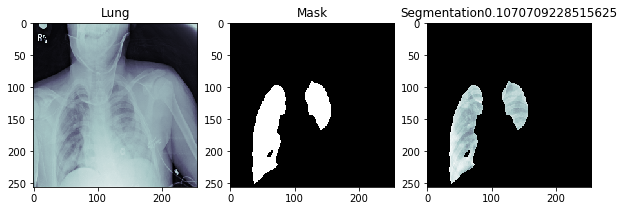

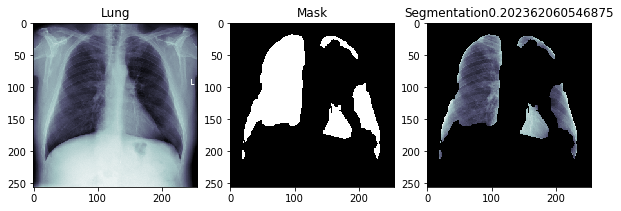

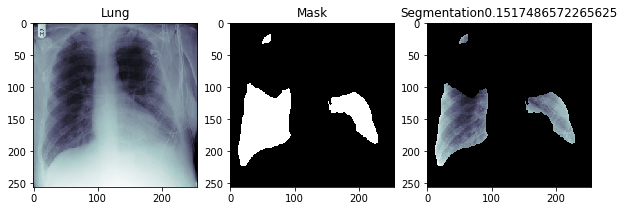

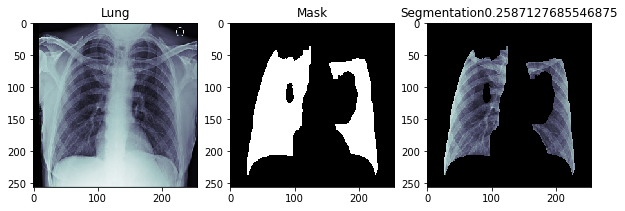

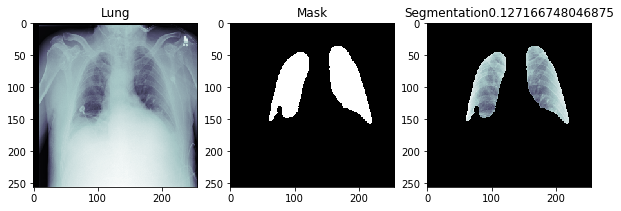

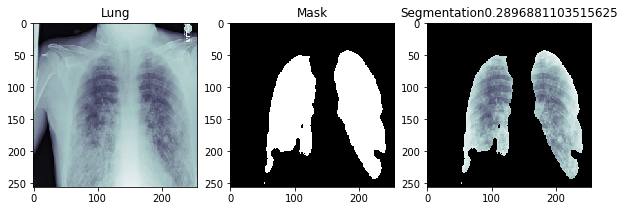

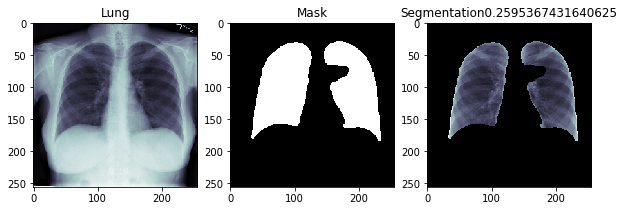

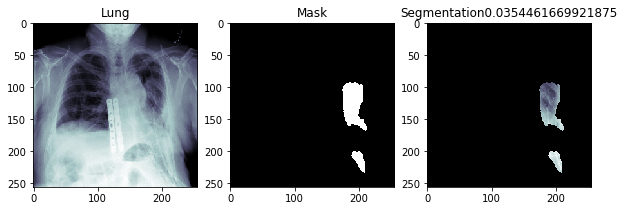

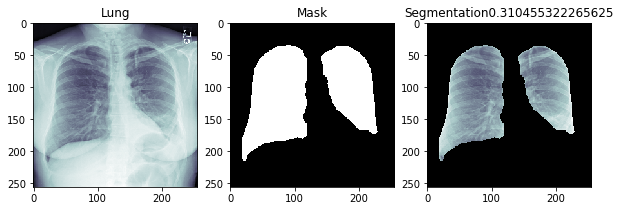

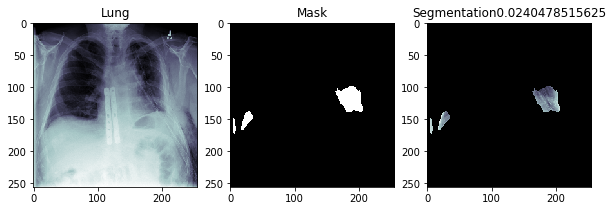

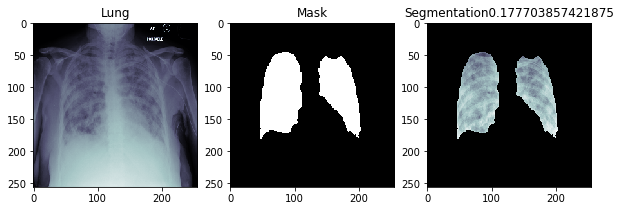

In [43]:
idx = 0
num_img = 50
import cv2
import matplotlib.pyplot as plt
for img1 in testGenerator2(CASE_DIR,num_img):
#for img1 in testGene2:
    #print(img1.shape)
    plt.figure(figsize=(10,20))
    plt.subplot(1,3,1)
    
    plt.imshow(img1[0,:,:,0],cmap=plt.cm.bone)
    #plt.axes('off')
    plt.title("Lung")
    
    plt.subplot(1,3,2)
    mask = results2[idx,:,:,0] > 0.5
    #print(mask.shape)
    plt.imshow(mask,cmap=plt.cm.bone)
    #plt.axes('off')
    plt.title("Mask")
    
    plt.subplot(1,3,3)
    croped = cv2.bitwise_and(img1[0,:,:,0],img1[0,:,:,0],mask=mask.astype(np.uint8))
    #print(croped.shape)
    plt.imshow(croped,cmap=plt.cm.bone)
    #plt.axes('off')
    plt.title("Segmentation"+str(np.sum(mask==True)/256/256))
    idx += 1
#     if idx >= num_img:
#         break
    
# img = pydicom.read_file(case_fp).pixel_array
# #img = np.stack([img]*3, -1)
# import skimage.transform as trans
# img_re = trans.resize(img,(256,256))

# plt.imshow(img_re, cmap=plt.cm.bone)
# _mask = result[0,:,:,0] > 0.5
# print(_mask)

# plt.imshow(_mask, cmap=plt.cm.bone)

# croped = cv2.bitwise_and(img_re, img_re, mask=_mask.astype(np.uint8))
# print(croped.shape)
# plt.imshow(croped, cmap=plt.cm.bone)


In [42]:
cntMask = np.sum(mask == True)
print(cntMask)
print(cntMask/256/256)

11646
0.177703857421875


[0. 0. 0. 0. 0. 0. 0. 0.]
[ 133. 1230. 2082. 3723. 4624. 4042. 2671. 1495.]


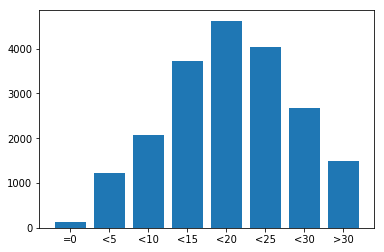

In [57]:
c = np.zeros(8)
print(c)
for msk in results2:
    #print(msk.shape)
    #print(msk[:,:,0])
    cnt = np.sum(msk[:,:,0] >0.5)/256./256.
    if  cnt == 0:
        c[0] += 1
    elif cnt <= 0.05:
        c[1] += 1
    elif cnt <= 0.1:
        c[2] += 1
    elif cnt <= 0.15:
        c[3] += 1
    elif cnt <= 0.2:
        c[4] += 1
    elif cnt <= 0.25:
        c[5] += 1
    elif cnt <= 0.3:
        c[6] += 1
    else:
        c[7] += 1
print(c)
b = ["=0","<5","<10","<15","<20","<25","<30",">30"]
plt.bar(b, c)
plt.show()

In [82]:
_img =  np.expand_dims(np.expand_dims(img_re, axis=0), axis=3)
result = model.predict(_img,1,verbose=1)

1/1 [==============================] - 0s 27ms/step


In [58]:
TEST_DIR = "/data/krf/dataset/stage_1_test_images/"
testGene3 = testGenerator2(TEST_DIR,1000)
model3 = unet()
model3.load_weights("unet_lung.hdf5")
results3 = model3.predict_generator(testGene3,1000,verbose=1)

1000/1000 [==============================] - 35s 35ms/step


[0. 0. 0. 0. 0. 0. 0. 0.]
[  5.  47.  96. 188. 231. 210. 135.  88.]


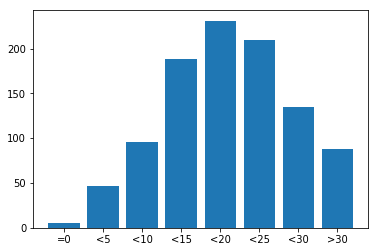

In [59]:
c2 = np.zeros(8)
print(c2)
for msk in results3:
    #print(msk.shape)
    #print(msk[:,:,0])
    cnt = np.sum(msk[:,:,0] >0.5)/256./256.
    if  cnt == 0:
        c2[0] += 1
    elif cnt <= 0.05:
        c2[1] += 1
    elif cnt <= 0.1:
        c2[2] += 1
    elif cnt <= 0.15:
        c2[3] += 1
    elif cnt <= 0.2:
        c2[4] += 1
    elif cnt <= 0.25:
        c2[5] += 1
    elif cnt <= 0.3:
        c2[6] += 1
    else:
        c2[7] += 1
print(c2)
b = ["=0","<5","<10","<15","<20","<25","<30",">30"]
plt.bar(b, c2)
plt.show()

(256, 256)


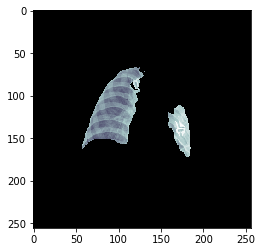